##### [2022-DataMining]
# ROC curve
#### 최민영

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 예측 결과 데이터 불러오기
* spotify hit predictor 예측 결과를 가져온다.

In [2]:
result = pd.read_csv("C:/Users/wl498/Documents/datamine/spotify_knn_15_rbst_seed1.csv")
result_sorted = result.sort_values('y_prob', ascending=True)

In [3]:
result_sorted.y_prob.unique()

array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
       0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
       0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
       1.        ])

In [4]:
from sklearn.metrics import roc_auc_score, roc_curve, recall_score

### 4-1. ROC curve

In [5]:
tpr_list = []
fpr_list = []
for p in result.sort_values('y_prob',ascending=True).y_prob.unique():
#print(p)
    y_pred = np.where(result.y_prob >= p, 1, 0)    
    tpr = recall_score(result.y_true,y_pred,pos_label=1)
    fpr = 1 - recall_score(result.y_true,y_pred,pos_label=0)    
    tpr_list.append(tpr)
    fpr_list.append(fpr)
tpr_list.append(0)
fpr_list.append(0)

Text(0.7, 0.2, 'AUC score: 0.855')

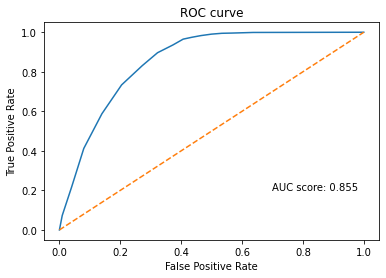

In [6]:
plt.plot(fpr_list, tpr_list)
plt.plot( [0,1], [0,1], linestyle = '--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
### AUC
auc_score = roc_auc_score(result.y_true,result.y_prob)
plt.text( 0.7, 0.2, f"AUC score: {auc_score:.3f}")

### 4-2. scikit-learn: ```roc_curve``` 이용

Text(0.7, 0.2, 'AUC score: 0.855')

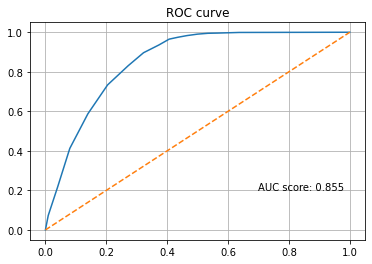

In [7]:
fpr, tpr, threshold = roc_curve(result.y_true, result.y_prob, pos_label = 1)
auc_score = roc_auc_score( result.y_true,  result.y_prob )
auc_score = roc_auc_score( result.y_true,  result.y_prob )
plt.plot( fpr, tpr)
plt.plot( [0,1], [0,1], linestyle = '--')
plt.title('ROC curve')
plt.grid()
plt.text( 0.7, 0.2, f"AUC score: {auc_score:.3f}")

In [8]:
J = tpr - fpr
opt_thres = threshold[np.argmax(J)]

In [9]:
def ROC(y_true, y_prob, return_metric = True, pos_label = 1):
    fpr, tpr, threshold = roc_curve(y_true, y_prob, pos_label = pos_label)
    ## youden's J statistics
    J = tpr - fpr
    opt_thres = threshold[np.argmax(J)]
    ## AUC curve
    auc_score = roc_auc_score(y_true,y_prob )
    ## plot ROC curve
    plt.plot( fpr, tpr)
    plt.plot( [0,1], [0,1], linestyle = '--')
    plt.title('ROC curve')
    plt.grid()
    plt.text( 0.7, 0.2, f"AUC score: {auc_score:.3f}")
    if return_metric:
        return {'AUC':auc_score, 'opt_thres':opt_thres}
    else:
        pass

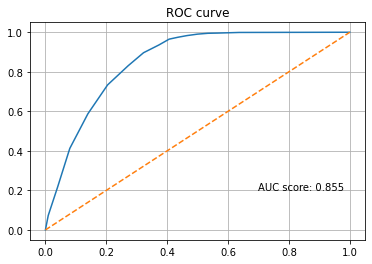

In [10]:
roc_metric = ROC(result.y_true, result.y_prob)

In [11]:
roc_metric['AUC']

0.8553202504004758

Text(0.7, 0.2, 'AUC score: 0.583')

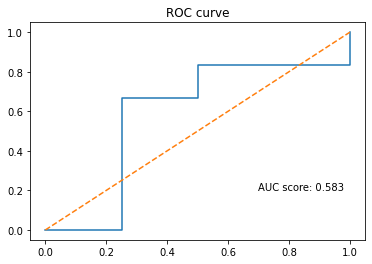

In [12]:
y_true = np.array([0,1,1,1,1,0,1,0,0,1])
y_prob = np.arange(0,1, 0.1)[::-1]
auc_score = roc_auc_score( y_true,  y_prob )
fpr, tpr, threshold = roc_curve(y_true, y_prob, pos_label = 1)
plt.plot( fpr, tpr)
plt.plot( [0,1], [0,1], linestyle = '--')
plt.title('ROC curve')
plt.text( 0.7, 0.2, f"AUC score: {auc_score:.3f}")

In [13]:
y_true, y_prob

(array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1]),
 array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ]))